## Exploratory Data Analysis
#### First step in any data science or machine learning project

make sure you have a folder named "data" in your project folder and the data folder is in the same folder as this     
make sure you are in your virtural environment    

python3 -m venv venv  
source venv/bin/activate   # macOS/Linux  
venv\Scripts\activate    # Windows  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read in data
print("Loading US Accidents dataset...")
file_path = './US_Accidents_March23.csv'
us_accidents = pd.read_csv(file_path)
print(f"Sample size: {len(us_accidents)}")

Loading US Accidents dataset...
Sample size: 7728394


In [5]:
# Check dataset size
print(us_accidents.shape)
# Get column types 
print(us_accidents.info())
# View first few rows
print(us_accidents.head())
# Check for missing values
print(us_accidents.isna().sum())

(7728394, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humi

In [21]:
# Group Pratices
# TODO: 1. Find the last 5 rows
print(us_accidents.tail(5))

# TODO: 2. Find the mean value of "Distance(mi)"
print(us_accidents['Distance(mi)'].mean())
# TODO: 3. Find the number of unique values in "Weather_Condition"
print(len(us_accidents['Weather_Condition'].unique()))

# TODO: 4. Find total number of accidents in MI
print(len(us_accidents[us_accidents["State"]=="MI"]))

# TODO: 5. Choose one column that interests you, find some patterns/interesting facts, and share

                ID   Source  Severity           Start_Time  \
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat  Start_Lng   End_Lat    End_Lng  \
7728389  2019-08-23 18:32:01   34.00248 -117.37936  33.99888 -117.37094   
7728390  2019-08-23 19:38:23   32.76696 -117.14806  32.76555 -117.15363   
7728391  2019-08-23 19:28:49   33.77545 -117.84779  33.77740 -117.85727   
7728392  2019-08-23 19:29:42   33.99246 -118.40302  33.98311 -118.39565   
7728393  2019-08-23 19:21:31   34.13393 -117.23092  34.13736 -117.23934   

         Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
7728389         0.543  ...      False   False  False           False   
7728390         0.338  ...      

## Basic Data Sampling
#### Sampling allows us to work with a smaller, representative subset while preserving key distributions

Look into this link for more data sampling techniques  
https://www.qualtrics.com/experience-management/research/sampling-methods/

In [30]:
# Sampling Goal: Extract a representative sample of 50,000 rows while maintaining the distribution of Severity.
# Use simple random sampling with pandas.sample()
us_accidents_sample = us_accidents.sample(n=50000, random_state=42) # random_state=42 ensures sample remains the same every time.
print(us_accidents_sample["Severity"].value_counts(normalize=True))


Severity
2    0.79716
3    0.16836
4    0.02598
1    0.00850
Name: proportion, dtype: float64


In [24]:
# TODO: Find the distribution of Severity of us_accidents
us_accidents["Severity"].value_counts(normalize=True)
# Is the distribution of Severity of us_accidents_sample similar to that of us_accidents?
# Almost identitical

Severity
2    0.796670
3    0.168125
4    0.026488
1    0.008717
Name: proportion, dtype: float64

In [28]:
# Random sampling may not preserve class proportions.
# TODO: Try stratified sampling to preserve class proportions with sklearn 
from sklearn.model_selection import train_test_split
us_accidents_sample, _ = train_test_split(us_accidents, train_size=20000, random_state=40)
print(us_accidents_sample["Severity"].value_counts(normalize=True))
# and compare the distribution with the original dataset

Severity
2    0.79395
3    0.16885
4    0.02865
1    0.00855
Name: proportion, dtype: float64


In [ ]:
# More practices: try other sampling methods on distribution of other features

## Data Cleaning & Preprocessing
#### Fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset
Ways to handle missing values: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/#h-list-of-methods-to-handle-missing-values-in-a-dataset  
Handling missing values and outliers: https://medium.com/gen-ai-adventures/handling-missing-values-and-outliers-in-data-analysis-c1ffc2dd5051  
Normalization methods: https://medium.com/@mkc940/different-normalization-methods-a1be71fe9f1  


In [32]:
# Number of null values for each column in descending order
print(us_accidents_sample.isna().sum().sort_values(ascending=False))

Precipitation(in)        14375
Wind_Chill(F)            13024
Wind_Speed(mph)           3811
Wind_Direction            1163
Visibility(mi)            1136
Humidity(%)               1126
Weather_Condition         1108
Temperature(F)            1061
Pressure(in)               905
Weather_Timestamp          795
Nautical_Twilight          165
Civil_Twilight             165
Sunrise_Sunset             165
Astronomical_Twilight      165
Airport_Code               148
Street                      83
Timezone                    49
Zipcode                     10
Traffic_Calming              0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Turning_Loop                 0
Traffic_Signal               0
Give_Way                     0
Start_Lat                    0
End_Time                     0
Start_Time                   0
Junction                     0
Bump                         0
Crossing

In [31]:
# Fill missing End_Lat and End_Lng with Start_Lat and Start_Lng (if missing)
us_accidents_sample["End_Lat"].fillna(us_accidents_sample["Start_Lat"], inplace=True)
us_accidents_sample["End_Lng"].fillna(us_accidents_sample["Start_Lng"], inplace=True)
# Drop irrelevant columns (e.g., ID if not useful for prediction).
us_accidents_sample.drop(columns=["ID"], inplace=True)

/var/folders/5y/wcgww58j65v99lffgqfdyl600000gn/T/ipykernel_10486/2923881683.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  us_accidents_sample["End_Lat"].fillna(us_accidents_sample["Start_Lat"], inplace=True)
/var/folders/5y/wcgww58j65v99lffgqfdyl600000gn/T/ipykernel_10486/2923881683.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate objec

In [40]:
# TODO: Fill missing values for "Wind_Speed(mph)" and "Visibility(mi)" with the mean of their respective columns
us_accidents_sample["Wind_Speed(mph)"].fillna(us_accidents_sample["Wind_Speed(mph)"].mean(), inplace=True)
us_accidents_sample["Visibility(mi)"].fillna(us_accidents_sample["Visibility(mi)"].mean(), inplace=True)

/var/folders/5y/wcgww58j65v99lffgqfdyl600000gn/T/ipykernel_10486/3920639547.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  us_accidents_sample["Wind_Speed(mph)"].fillna(us_accidents_sample["Wind_Speed(mph)"].mean(), inplace=True)
/var/folders/5y/wcgww58j65v99lffgqfdyl600000gn/T/ipykernel_10486/3920639547.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because t

In [51]:
print(us_accidents_sample.isna().sum().sort_values(ascending=False))
us_accidents_sample["Precipitation(in)"].fillna(us_accidents_sample["Precipitation(in)"].mean(), inplace=True)
us_accidents_sample["Wind_Chill(F)"].fillna(us_accidents_sample["Wind_Chill(F)"].mean(), inplace=True)
#us_accidents_sample["Wind_Direction"].fillna(us_accidents_sample["Wind_Direction"].mean(), inplace=True)
us_accidents_sample["Humidity(%)"].fillna(us_accidents_sample["Humidity(%)"].mean(), inplace=True)

Wind_Direction           1163
Humidity(%)              1126
Weather_Condition        1108
Temperature(F)           1061
Pressure(in)              905
Weather_Timestamp         795
Astronomical_Twilight     165
Nautical_Twilight         165
Civil_Twilight            165
Sunrise_Sunset            165
Airport_Code              148
Street                     83
Timezone                   49
Zipcode                    10
Amenity                     0
No_Exit                     0
Railway                     0
Roundabout                  0
Station                     0
Stop                        0
Junction                    0
Traffic_Calming             0
Traffic_Signal              0
Give_Way                    0
Turning_Loop                0
Crossing                    0
Bump                        0
Source                      0
Visibility(mi)              0
Precipitation(in)           0
Distance(mi)                0
Start_Time                  0
End_Time                    0
Start_Lat 

/var/folders/5y/wcgww58j65v99lffgqfdyl600000gn/T/ipykernel_10486/1428630249.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  us_accidents_sample["Precipitation(in)"].fillna(us_accidents_sample["Precipitation(in)"].mean(), inplace=True)
/var/folders/5y/wcgww58j65v99lffgqfdyl600000gn/T/ipykernel_10486/1428630249.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becau

In [41]:

# TODO: Process all columns with missing values with appropriate methods (e.g., mean, median, mode, or drop etc.)
print(us_accidents_sample.isna().sum().sort_values(ascending=False))

Precipitation(in)        14375
Wind_Chill(F)            13024
Wind_Direction            1163
Humidity(%)               1126
Weather_Condition         1108
Temperature(F)            1061
Pressure(in)               905
Weather_Timestamp          795
Nautical_Twilight          165
Civil_Twilight             165
Sunrise_Sunset             165
Astronomical_Twilight      165
Airport_Code               148
Street                      83
Timezone                    49
Zipcode                     10
County                       0
Traffic_Calming              0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Turning_Loop                 0
Traffic_Signal               0
Give_Way                     0
Start_Lat                    0
End_Time                     0
Start_Time                   0
Junction                     0
Amenity                      0
Crossing                     0
Bump    

In [ ]:
# TODO Challenge: Apply KNN imputation for missing values of "Start_Lat" and "Start_Lng"
from sklearn.impute import KNNImputer

## Data Preprocessing
#### Preparing and cleaning the dataset to make it more suitable for machine learning algorithms


In [47]:
# Perform one-hot encoding on categorical column - "Sunrise_Sunset"
print(us_accidents_sample["Sunrise_Sunset"].unique())

['Day' 'Night' nan]


In [48]:
us_accidents_sample["Sunrise_Sunset"] = us_accidents_sample["Sunrise_Sunset"].map({"Day": 0, "Night": 1})
print(us_accidents_sample["Sunrise_Sunset"].unique())

[ 0.  1. nan]


In [66]:
# TODO: Choose another categorical column and apply encoding
print(us_accidents_sample["Timezone"].unique())
us_accidents_sample["Timezone"] = us_accidents_sample["Timezone"].map({"US/Eastern": 0, "US/Pacific": 1, "US/Mountain": 2, "US/Central": 3})
print(us_accidents_sample["Timezone"].unique())

[ 0.  1.  2.  3. nan]
[nan]


In [49]:
# Convert 'Start_Time' to datetime and extract the year
us_accidents_sample['Start_Time'] = us_accidents_sample['Start_Time'].str.split('.').str[0]
us_accidents_sample['Start_Time'] = pd.to_datetime(us_accidents['Start_Time'].str.split('.').str[0], errors='coerce')
us_accidents_sample['Year'] = us_accidents_sample['Start_Time'].dt.year
us_accidents_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 7133276 to 3460073
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Source                 50000 non-null  object        
 1   Severity               50000 non-null  int64         
 2   Start_Time             50000 non-null  datetime64[ns]
 3   End_Time               50000 non-null  object        
 4   Start_Lat              50000 non-null  float64       
 5   Start_Lng              50000 non-null  float64       
 6   End_Lat                50000 non-null  float64       
 7   End_Lng                50000 non-null  float64       
 8   Distance(mi)           50000 non-null  float64       
 9   Description            50000 non-null  object        
 10  Street                 49917 non-null  object        
 11  City                   50000 non-null  object        
 12  County                 50000 non-null  object        
 13

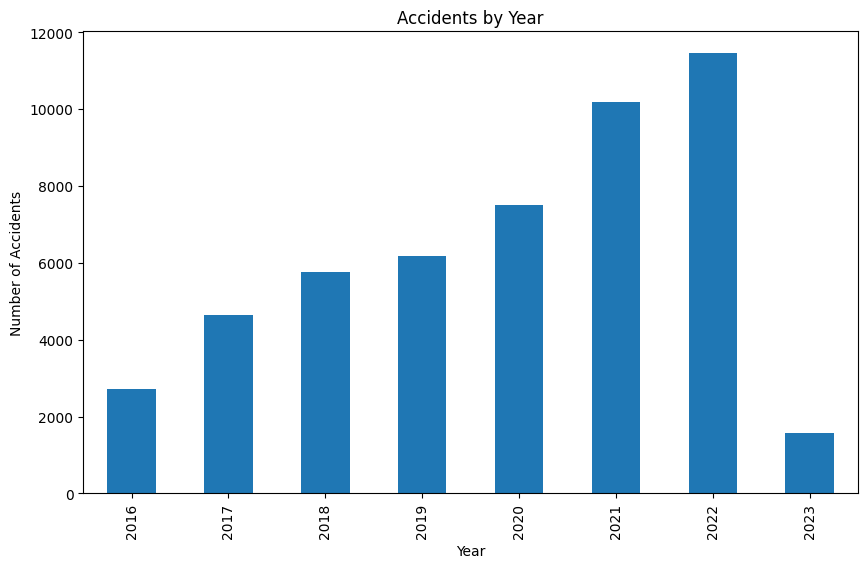

In [50]:
# Simple plot of accidents by year
plt.figure(figsize=(10, 6))
us_accidents_sample['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

In [ ]:
# Does your plot show any interesting patterns or trends?
# Does your sampled data show similar patterns/trends as the original dataset?

In [68]:
# TODO: 1. Extract hour of the day from "Start_Time"
us_accidents_sample['Start_Time'] = pd.to_datetime(us_accidents_sample['Start_Time'])
us_accidents_sample['Hour_of_Day'] = us_accidents_sample['Start_Time'].dt.hour
# TODO: 2. Create new feature: duration = (End_Time - Start_Time)
us_accidents_sample['End_Time'] = pd.to_datetime(us_accidents_sample['End_Time'])
duration = us_accidents_sample['End_Time'] - us_accidents_sample['Start_Time'] 

ValueError: unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": ".000000000", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [33]:
# TODO: 3. Try Min-Max Normalization on "Distance(mi)" 
from sklearn.preprocessing import MinMaxScaler

# TODO: 4. Try Standardization on "Precipitation(in)"
from sklearn.preprocessing import StandardScaler

In [ ]:
# Save the cleaned sample to a new CSV file
us_accidents_sample.to_csv("US_Accidents_Cleaned.csv", index=False)

DO NOT normalize/standardize categorical features!!!

## EDA for Traffic Flow Data 